<a href="https://colab.research.google.com/github/juhungaro/Pipoca/blob/main/Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1 – Pré-processamento dos Dados

*   Organizar os datasets de imagens e dados temporais coletados na Sprint 1.
*   Realizar tratamento dos dados, garantindo que estejam estruturados e prontos para serem usados no modelo.
*   Identificar padrões e sazonalidades na série temporal NDVI, explorando diferentes abordagens estatísticas para entender variações de produtividade.

# Dados SatVeg

Dados obtidos do sensor SatVeg para a Fazenda São José, Sorriso-MT
Coordenadas: -55.95520,-12.88229 | -55.95729,-12.88229

In [ ]:
# 1. Carregamento importação de dados
print("1. Carregamento dos dados do SatVeg")
from google.colab import files
uploaded = files.upload()

# Carregar o arquivo CSV
filename = list(uploaded.keys())[0]
df_satveg = pd.read_csv(filename, encoding='latin1', sep=';')

# Informações básicas
print(f"Arquivo carregado: {filename}")
print(f"Dimensões: {df_satveg.shape[0]} linhas x {df_satveg.shape[1]} colunas")


1. Carregamento dos dados do SatVeg


Saving dados_satveg.csv to dados_satveg (1).csv
Arquivo carregado: dados_satveg (1).csv
Dimensões: 576 linhas x 4 colunas


In [ ]:
## 2. Pré-processamento
print("\n2. Pré-processamento dos dados")

# Converter colunas data
if 'Data' in df_satveg.columns:
    df_satveg['Data'] = pd.to_datetime(df_satveg['Data'], format='%d/%m/%Y', errors='coerce')
    print("- Coluna 'Data' convertida para datetime")

# Converter colunas numéricas
colunas_numericas = ["NDVI", "PreFiltro", "FlatBottom"]
print("- Convertendo colunas numéricas:")

for coluna in colunas_numericas:
    if coluna in df_satveg.columns:
        # Guardar tipo original para mostrar a mudança
        tipo_original = df_satveg[coluna].dtype

        # Converter de string com vírgula para float
        if df_satveg[coluna].dtype == 'object':
            df_satveg[coluna] = df_satveg[coluna].str.replace(',', '.').astype(float)
            print(f"  Coluna '{coluna}' convertida: {tipo_original} → {df_satveg[coluna].dtype}")
        else:
            print(f"  Coluna '{coluna}' já é do tipo numérico: {df_satveg[coluna].dtype}")
    else:
        print(f"  Atenção: Coluna '{coluna}' não encontrada no DataFrame")

# Verificar valores nulos
nulos = df_satveg.isnull().sum()
print("- Valores nulos por coluna:")
print(nulos[nulos > 0] if any(nulos > 0) else "  Não há valores nulos")


2. Pré-processamento dos dados
- Coluna 'Data' convertida para datetime
- Convertendo colunas numéricas:
  Coluna 'NDVI' convertida: object → float64
  Coluna 'PreFiltro' convertida: object → float64
  Coluna 'FlatBottom' convertida: object → float64
- Valores nulos por coluna:
  Não há valores nulos


In [ ]:
df_satveg.head()

,Data,NDVI,PreFiltro,FlatBottom,NDVI_media_diaria
0,2000-02-18,0.6119,0.6542,0.6542,0.6119
1,2000-03-05,0.6542,0.6542,0.6542,0.6542
2,2000-03-21,0.5751,0.5751,0.6542,0.5751
3,2000-04-06,0.6839,0.6839,0.6839,0.6839
4,2000-04-22,0.4797,0.4797,0.4808,0.4797


In [ ]:
# Garante que 'Data' está como datetime
df_satveg['Data'] = pd.to_datetime(df_satveg['Data'], errors='coerce')

# Cria a coluna 'AnoMes' no formato 'YYYY-MM'
df_satveg['AnoMes'] = df_satveg['Data'].dt.to_period('M').astype(str)

if 'NDVI' in df_satveg.columns and 'AnoMes' in df_satveg.columns:
    # Para cada mês, calcula a média e atribui a todas as linhas daquele mês
    df_satveg['NDVI_media_mensal'] = df_satveg.groupby('AnoMes')['NDVI'].transform('mean')
    print("\nColuna 'NDVI_media_mensal' adicionada ao DataFrame!")
    print(df_satveg[['Data', 'NDVI', 'AnoMes', 'NDVI_media_mensal']].head())
else:
    print("\nNão foi possível criar a média mensal do NDVI: Colunas necessárias não encontradas.")





Coluna 'NDVI_media_mensal' adicionada ao DataFrame!
        Data    NDVI   AnoMes  NDVI_media_mensal
0 2000-02-18  0.6119  2000-02            0.61190
1 2000-03-05  0.6542  2000-03            0.61465
2 2000-03-21  0.5751  2000-03            0.61465
3 2000-04-06  0.6839  2000-04            0.58180
4 2000-04-22  0.4797  2000-04            0.58180


In [ ]:
## 3. Análise Exploratória Básica
print("\n3. Análise Exploratória Básica")
print("- Primeiras linhas dos dados:")
display(df_satveg.head())

print("\n- Resumo estatístico das colunas numéricas:")
display(df_satveg[colunas_numericas].describe())


3. Análise Exploratória Básica
- Primeiras linhas dos dados:


,Data,NDVI,PreFiltro,FlatBottom
0,2000-02-18,0.6119,0.6542,0.6542
1,2000-03-05,0.6542,0.6542,0.6542
2,2000-03-21,0.5751,0.5751,0.6542
3,2000-04-06,0.6839,0.6839,0.6839
4,2000-04-22,0.4797,0.4797,0.4808



- Resumo estatístico das colunas numéricas:


,NDVI,PreFiltro,FlatBottom
count,576.000000,576.000000,576.000000
mean,0.438249,0.470147,0.478435
std,0.185401,0.178731,0.176696
min,-0.300000,0.158200,0.187300
25%,0.291450,0.307225,0.310100
50%,0.391100,0.447650,0.468250
75%,0.590000,0.624850,0.629725
max,0.871500,0.871500,0.871500



4. Visualização de Dados
 Histograma - Distribuição das variáveis:


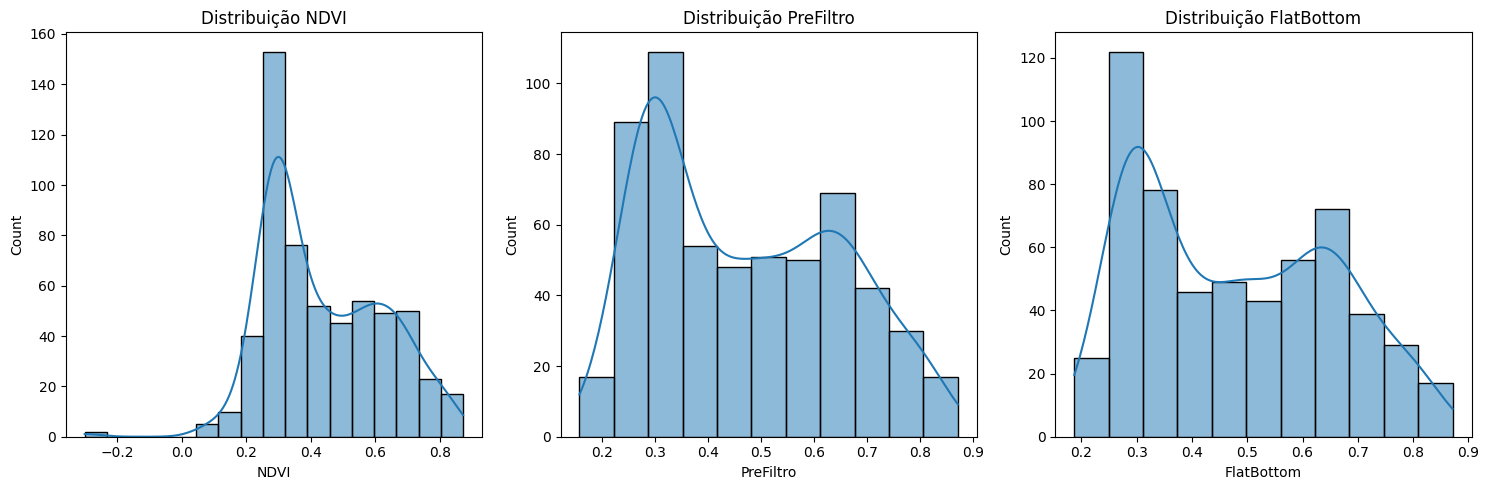

In [ ]:
## 4. Visualização de Dados
print("\n4. Visualização de Dados")

# 4.1 Distribuições (histogramas)
print(" Histograma - Distribuição das variáveis:")
plt.figure(figsize=(15, 5))

for i, coluna in enumerate(colunas_numericas):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_satveg[coluna], kde=True)
    plt.title(f'Distribuição {coluna}')

plt.tight_layout()
plt.show()


 Evolução temporal das métricas:


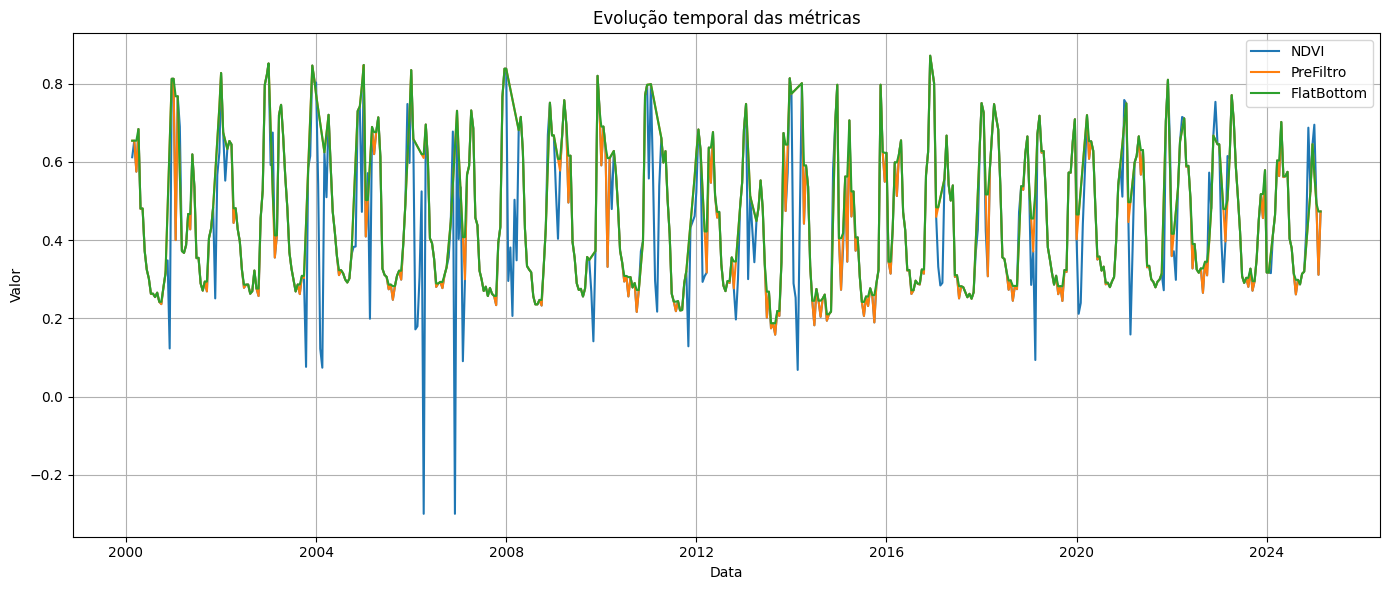

In [ ]:
# 4.2 Séries temporais
print("\n Evolução temporal das métricas:")
plt.figure(figsize=(14, 6))
for coluna in colunas_numericas:
    plt.plot(df_satveg['Data'], df_satveg[coluna], label=coluna)
plt.title('Evolução temporal das métricas')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



 Dispersão - Relações entre variáveis:


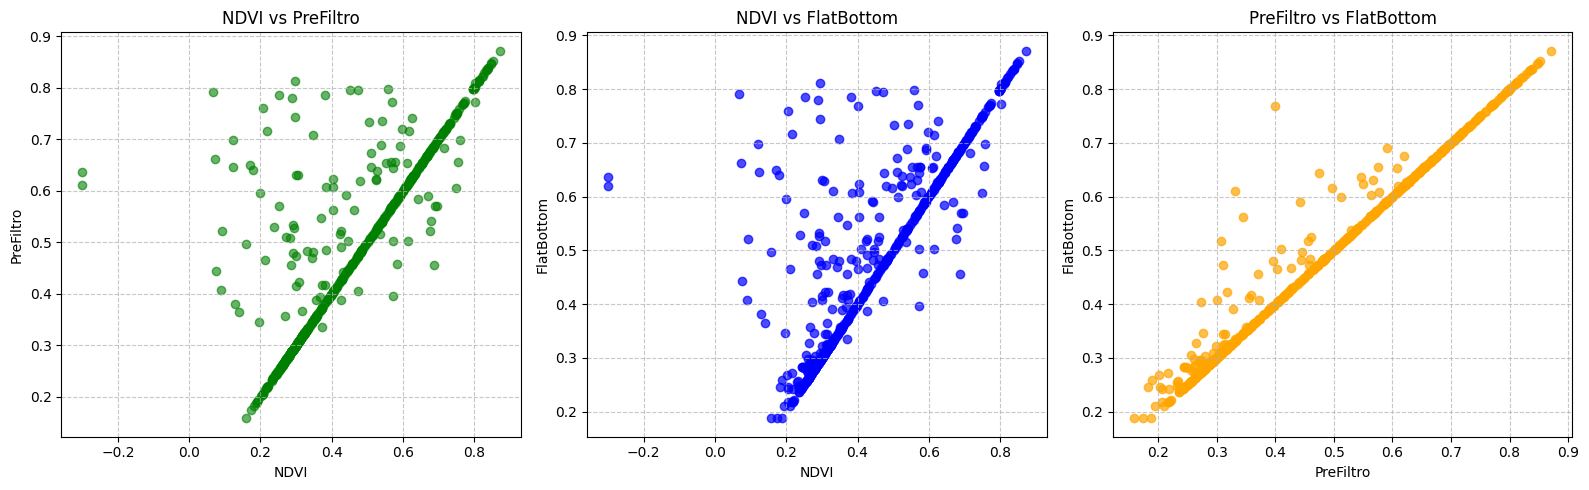

In [ ]:
# 4.3 Relações entre variáveis (dispersão)
print("\n Dispersão - Relações entre variáveis:")
plt.figure(figsize=(16, 5))

# Gráfico 1: NDVI vs PreFiltro
plt.subplot(1, 3, 1)
plt.scatter(df_satveg['NDVI'], df_satveg['PreFiltro'], alpha=0.6, color='green' )
plt.title('NDVI vs PreFiltro')
plt.xlabel('NDVI')
plt.ylabel('PreFiltro')
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfico 2: NDVI vs FlatBottom
plt.subplot(1, 3, 2)
plt.scatter(df_satveg['NDVI'], df_satveg['FlatBottom'], alpha=0.7, color='blue')
plt.title('NDVI vs FlatBottom')
plt.xlabel('NDVI')
plt.ylabel('FlatBottom')
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfico 3: PreFiltro vs FlatBottom
plt.subplot(1, 3, 3)
plt.scatter(df_satveg['PreFiltro'], df_satveg['FlatBottom'], alpha=0.7, color='orange')
plt.title('PreFiltro vs FlatBottom')
plt.xlabel('PreFiltro')
plt.ylabel('FlatBottom')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


 Boxplots - Comparação de distribuição entre variáveis:


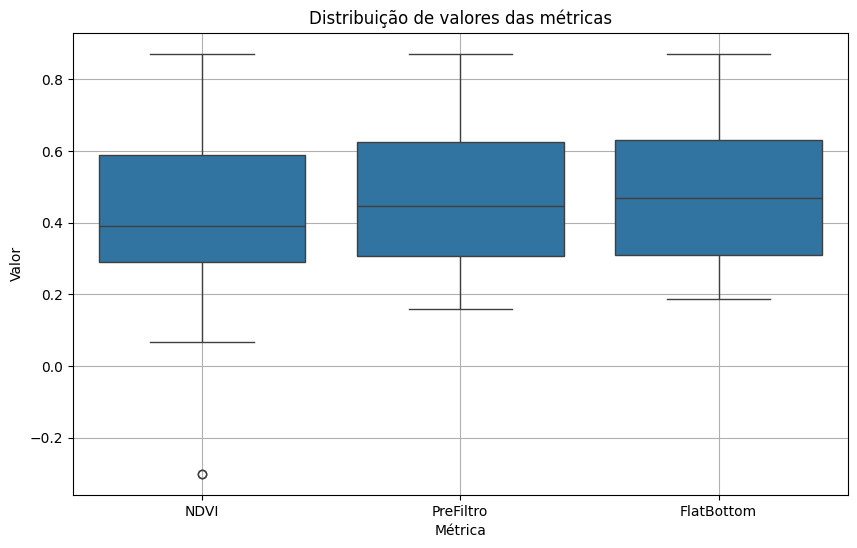

In [ ]:
# 4.4 Comparação de variáveis (boxplots)
print("\n Boxplots - Comparação de distribuição entre variáveis:")
plt.figure(figsize=(10, 6))
df_melt = df_satveg.melt(id_vars='Data', value_vars=colunas_numericas,
                  var_name='Métrica', value_name='Valor')
sns.boxplot(x='Métrica', y='Valor', data=df_melt)
plt.title('Distribuição de valores das métricas')
plt.grid(True)
plt.show()


 Matriz de correlação entre as métricas:


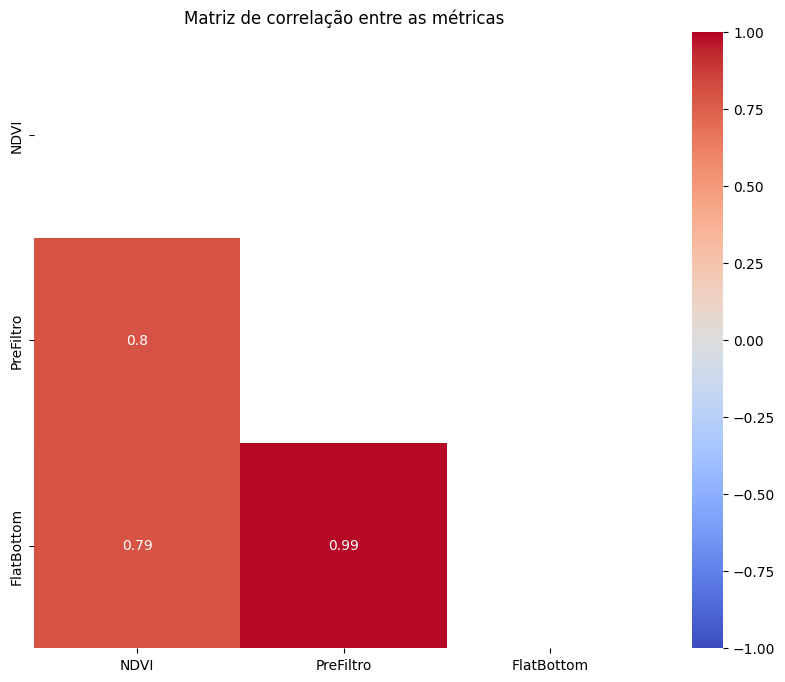

In [ ]:
# 4.5 Matriz de correlação
print("\n Matriz de correlação entre as métricas:")
plt.figure(figsize=(10, 8))
corr = df_satveg[colunas_numericas].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Matriz de correlação entre as métricas')
plt.show()



In [ ]:
# 4.6 Visualizações interativas com Altair
print("\n Visualização interativa de séries temporais:")

# Criar gráfico interativo para cada métrica
charts = []
for coluna in colunas_numericas:
    chart = alt.Chart(df_satveg).mark_line().encode(
        x='Data',
        y=alt.Y(coluna, title=coluna),
        tooltip=['Data', coluna]
    ).properties(
        title=f'Série Temporal - {coluna}',
        width=300,
        height=200
    )
    charts.append(chart)

# Exibir gráficos em grid
display(alt.vconcat(*charts))



 Visualização interativa de séries temporais:


alt.VConcatChart(...)

In [ ]:
df_satveg.head()

,Data,NDVI,PreFiltro,FlatBottom,NDVI_media_diaria
0,2000-02-18,0.6119,0.6542,0.6542,0.6119
1,2000-03-05,0.6542,0.6542,0.6542,0.6542
2,2000-03-21,0.5751,0.5751,0.6542,0.5751
3,2000-04-06,0.6839,0.6839,0.6839,0.6839
4,2000-04-22,0.4797,0.4797,0.4808,0.4797


In [ ]:
## 5. Exportação/Salvamento dos Dados Processados
print("\n5. Exportação dos Dados Processados")
df_satveg.to_csv('satveg_processado.csv', index=False)
print("- Dados processados salvos como 'satveg_processado.csv'")


5. Exportação dos Dados Processados
- Dados processados salvos como 'satveg_processado.csv'


In [22]:
from google.colab import files
uploaded = files.upload()

Saving Clima_Sorriso_2018.csv to Clima_Sorriso_2018.csv
Saving Clima_Sorriso_2019.csv to Clima_Sorriso_2019.csv
Saving Clima_Sorriso_2025.csv to Clima_Sorriso_2025.csv
Saving Clima_Sorriso_2024.csv to Clima_Sorriso_2024.csv
Saving Clima_Sorriso_2023.csv to Clima_Sorriso_2023.csv
Saving Clima_Sorriso_2020.csv to Clima_Sorriso_2020.csv
Saving Clima_Sorriso_2017.csv to Clima_Sorriso_2017.csv
Saving Clima_Sorriso_2016.csv to Clima_Sorriso_2016.csv
Saving Clima_Sorriso_2015.csv to Clima_Sorriso_2015.csv


# Dados metereológicos INMET
Optamos por fazer download dos arquivos, pois via API ia ficar muito lento

Fonte de dados https://portal.inmet.gov.br/dadoshistoricos

Upload dos dados

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [36]:
# Check dos arquivos carregados
df = pd.read_csv("Clima_Sorriso_2025.csv", sep=";", encoding='latin1')
print("\nVisualização correta do arquivo:")
print(df.head())




Visualização correta do arquivo:
         DATA      HORA  RADIACAO  TEMPERATURA
0  01/01/2025  0000 UTC       NaN         27.0
1  01/01/2025  0100 UTC       NaN         25.8
2  01/01/2025  0200 UTC       NaN         26.0
3  01/01/2025  0300 UTC       NaN         25.9
4  01/01/2025  0400 UTC       NaN         25.5


In [37]:
# Lista de DataFrames
dfs = []
for fname in uploaded.keys():
    # Ensure 'fname' is a string, not bytes
    if isinstance(fname, bytes):
        fname = fname.decode('utf-8')
    dfs.append(pd.read_csv(fname, encoding='latin1', sep=';'))

# Juntar todos na ordem do upload
df_climatotal = pd.concat(dfs, ignore_index=True)

print(f"\nBase consolidada: {df_climatotal.shape[0]} linhas x {df_climatotal.shape[1]} colunas.")
display(df_climatotal.head())



Base consolidada: 72312 linhas x 5 colunas.


,DATA,HORA,RADIACAO,TEMPERATURA,RADIACA
0,01/01/2018,00:00,-9999,25.0,NaN
1,01/01/2018,01:00,-9999,24.3,NaN
2,01/01/2018,02:00,-9999,23.5,NaN
3,01/01/2018,03:00,-9999,23.3,NaN
4,01/01/2018,04:00,-9999,23.1,NaN


In [53]:
# Validar os periodos do dataframe
df_climatotal['DATA'] = pd.to_datetime(df_climatotal['DATA'], format='%d/%m/%Y')

# 2. Encontrar a menor e maior data:
menor_data = df_climatotal['DATA'].min()
maior_data = df_climatotal['DATA'].max()

# 3. Mostrar
print("Menor data:", menor_data.strftime('%d/%m/%Y'))
print("Maior data:", maior_data.strftime('%d/%m/%Y'))

df_climatotal['RADIACAO'] = df_climatotal['RADIACAO'].replace(-9999, np.nan)
df_climatotal['TEMPERATURA'] = df_climatotal['TEMPERATURA'].replace(-9999, np.nan)


Menor data: 01/01/2015
Maior data: 31/03/2025


In [54]:
df_climatotal.to_csv('clima_consolidados.csv', index=False)
print("Arquivo 'clima_consolidados.csv' salvo!")


Arquivo 'clima_consolidados.csv' salvo!


Visão geral da estrutura

In [55]:
# Tamanho do dataset
print(f"Linhas: {df_climatotal.shape[0]}, Colunas: {df_climatotal.shape[1]}")

# Mostra os primeiros registros
display(df_climatotal.head(10))

# Informações gerais das colunas
df_climatotal.info()

# Checa as primeiras datas (caso ainda precise revisar datas)
print("Menor data:", df_climatotal['DATA'].min())
print("Maior data:", df_climatotal['DATA'].max())


Linhas: 72312, Colunas: 5


,DATA,HORA,RADIACAO,TEMPERATURA,RADIACA
0,2018-01-01,00:00,NaN,25.0,NaN
1,2018-01-01,01:00,NaN,24.3,NaN
2,2018-01-01,02:00,NaN,23.5,NaN
3,2018-01-01,03:00,NaN,23.3,NaN
4,2018-01-01,04:00,NaN,23.1,NaN
5,2018-01-01,05:00,NaN,22.9,NaN
6,2018-01-01,06:00,NaN,22.6,NaN
7,2018-01-01,07:00,NaN,22.3,NaN
8,2018-01-01,08:00,NaN,22.2,NaN
9,2018-01-01,09:00,NaN,22.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATA         72312 non-null  datetime64[ns]
 1   HORA         72312 non-null  object        
 2   RADIACAO     68261 non-null  float64       
 3   TEMPERATURA  67273 non-null  float64       
 4   RADIACA      8760 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 2.8+ MB
Menor data: 2015-01-01 00:00:00
Maior data: 2025-03-31 00:00:00


In [63]:
# Remove a coluna 'RADIACA' permanentemente do DataFrame
df_climatotal = df_climatotal.drop('RADIACA', axis=1)


In [67]:
df_climatotal.loc[df_climatotal['RADIACAO'] < 0, 'RADIACAO'] = np.nan


Análise de valores nulos, duplicados e conversão de tipo de coluna

In [68]:
# Nulos por coluna
print("\nValores nulos por coluna:")
print(df_climatotal.isnull().sum())

# % de nulos para priorizar tratamento
print("\nPorcentagem de nulos:")
print(df_climatotal.isnull().mean().sort_values(ascending=False)*100)

# Linhas duplicadas
print("\nQtde de linhas duplicadas:", df_climatotal.duplicated().sum())

# Converter DATA para datetime
df_climatotal['DATA'] = pd.to_datetime(df_climatotal['DATA'], format='%d/%m/%Y')

# Converter RADIACAO para float
if df_climatotal['RADIACAO'].dtype == 'object':
    df_climatotal['RADIACAO'] = df_climatotal['RADIACAO'].str.replace(',', '.')
    df_climatotal['RADIACAO'] = pd.to_numeric(df_climatotal['RADIACAO'], errors='coerce')

# Pronto! Agora os tipos estão ajustados.
print(df_climatotal.dtypes)




Valores nulos por coluna:
DATA               0
HORA               0
RADIACAO       67603
TEMPERATURA     5039
dtype: int64

Porcentagem de nulos:
RADIACAO       93.487941
TEMPERATURA     6.968415
HORA            0.000000
DATA            0.000000
dtype: float64

Qtde de linhas duplicadas: 0
DATA           datetime64[ns]
HORA                   object
RADIACAO              float64
TEMPERATURA           float64
dtype: object


Estatística descritiva

In [69]:
print(df_climatotal.describe())


                                DATA     RADIACAO   TEMPERATURA
count                          72312  4709.000000  67273.000000
mean   2019-09-01 21:57:10.335214080  1334.669378     25.312555
min              2015-01-01 00:00:00     0.000000      3.800000
25%              2017-01-23 00:00:00   348.600000     22.300000
50%              2019-02-15 00:00:00  1288.400000     24.500000
75%              2023-03-09 00:00:00  2241.500000     28.700000
max              2025-03-31 00:00:00  3917.700000     39.400000
std                              NaN  1009.941617      4.893521


Percebemos que a radiação global esta muito alta

In [70]:
print('RADIACAO → mínimo:', df_climatotal['RADIACAO'].min(), 'máximo:', df_climatotal['RADIACAO'].max())
print('TEMPERATURA → mínimo:', df_climatotal['TEMPERATURA'].min(), 'máximo:', df_climatotal['TEMPERATURA'].max())
print('Primeiros 10 valores de RADIACAO:', df_climatotal['RADIACAO'].head(10).values)
print('Primeiros 10 valores de TEMPERATURA:', df_climatotal['TEMPERATURA'].head(10).values)


RADIACAO → mínimo: 0.0 máximo: 3917.7
TEMPERATURA → mínimo: 3.8 máximo: 39.4
Primeiros 10 valores de RADIACAO: [nan nan nan nan nan nan nan nan nan nan]
Primeiros 10 valores de TEMPERATURA: [25.  24.3 23.5 23.3 23.1 22.9 22.6 22.3 22.2 22. ]


In [73]:
media = df_climatotal['RADIACAO'].mean()
std = df_climatotal['RADIACAO'].std()
print(f"Média: {media:.2f}")
print(f"Desvio padrão: {std:.2f}")




Média: 1334.67
Desvio padrão: 1009.94


In [74]:
limite_superior = media + 3*std
limite_inferior = media - 3*std

outliers = df_climatotal[(df_climatotal['RADIACAO'] > limite_superior) | (df_climatotal['RADIACAO'] < limite_inferior)]

print("Valores excessivos de RADIAÇÃO (outliers >3σ):")
print(outliers[['DATA', 'RADIACAO']])


Valores excessivos de RADIAÇÃO (outliers >3σ):
Empty DataFrame
Columns: [DATA, RADIACAO]
Index: []


In [85]:
print("10 maiores valores:")
print(df_climatotal[['DATA', 'RADIACAO']].sort_values('RADIACAO', ascending=False).head(10))

print("10 menores valores (diferentes de zero/nan):")
print(df_climatotal[['DATA', 'RADIACAO']][df_climatotal['RADIACAO'] > 0].sort_values('RADIACAO', ascending=True).head(10))


10 maiores valores:
           DATA  RADIACAO
1096 2018-02-15    3917.7
232  2018-01-10    3797.3
352  2018-01-15    3778.1
1432 2018-03-01    3689.1
1120 2018-02-16    3626.3
1937 2018-03-22    3621.7
8584 2018-12-24    3607.6
952  2018-02-09    3594.5
7263 2018-10-30    3571.0
425  2018-01-18    3553.5
10 menores valores (diferentes de zero/nan):
           DATA  RADIACAO
8697 2018-12-29       0.1
7279 2018-10-31       0.1
7583 2018-11-12       0.1
8241 2018-12-10       0.1
8215 2018-12-09       0.1
6334 2018-09-21       0.1
6774 2018-10-10       0.2
1088 2018-02-15       0.2
2336 2018-04-08       0.2
6772 2018-10-10       0.2


In [88]:
media = df_climatotal['RADIACAO'].mean()
std = df_climatotal['RADIACAO'].std()
limite_superior = media + 3*std
limite_inferior = media - 3*std


In [89]:
df_sem_outliers = df_climatotal[(df_climatotal['RADIACAO'] <= limite_superior) & (df_climatotal['RADIACAO'] >= limite_inferior)]


In [90]:
print('Original:', len(df_climatotal), 'Registros após excluir outliers:', len(df_sem_outliers))


Original: 72312 Registros após excluir outliers: 4709


In [91]:
df_climatotal = df_climatotal.reset_index(drop=True)


In [92]:
print(df_climatotal.describe())

                                DATA     RADIACAO   TEMPERATURA
count                          72312  4709.000000  67273.000000
mean   2019-09-01 21:57:10.335214080  1334.669378     25.312555
min              2015-01-01 00:00:00     0.000000      3.800000
25%              2017-01-23 00:00:00   348.600000     22.300000
50%              2019-02-15 00:00:00  1288.400000     24.500000
75%              2023-03-09 00:00:00  2241.500000     28.700000
max              2025-03-31 00:00:00  3917.700000     39.400000
std                              NaN  1009.941617      4.893521


In [86]:
print("10 maiores valores:")
print(df_climatotal[['DATA', 'RADIACAO']].sort_values('RADIACAO', ascending=False).head(10))

print("10 menores valores (diferentes de zero/nan):")
print(df_climatotal[['DATA', 'RADIACAO']][df_climatotal['RADIACAO'] > 0].sort_values('RADIACAO', ascending=True).head(10))


10 maiores valores:
           DATA  RADIACAO
1096 2018-02-15    3917.7
232  2018-01-10    3797.3
352  2018-01-15    3778.1
1432 2018-03-01    3689.1
1120 2018-02-16    3626.3
1937 2018-03-22    3621.7
8584 2018-12-24    3607.6
952  2018-02-09    3594.5
7263 2018-10-30    3571.0
425  2018-01-18    3553.5
10 menores valores (diferentes de zero/nan):
           DATA  RADIACAO
8697 2018-12-29       0.1
7279 2018-10-31       0.1
7583 2018-11-12       0.1
8241 2018-12-10       0.1
8215 2018-12-09       0.1
6334 2018-09-21       0.1
6774 2018-10-10       0.2
1088 2018-02-15       0.2
2336 2018-04-08       0.2
6772 2018-10-10       0.2


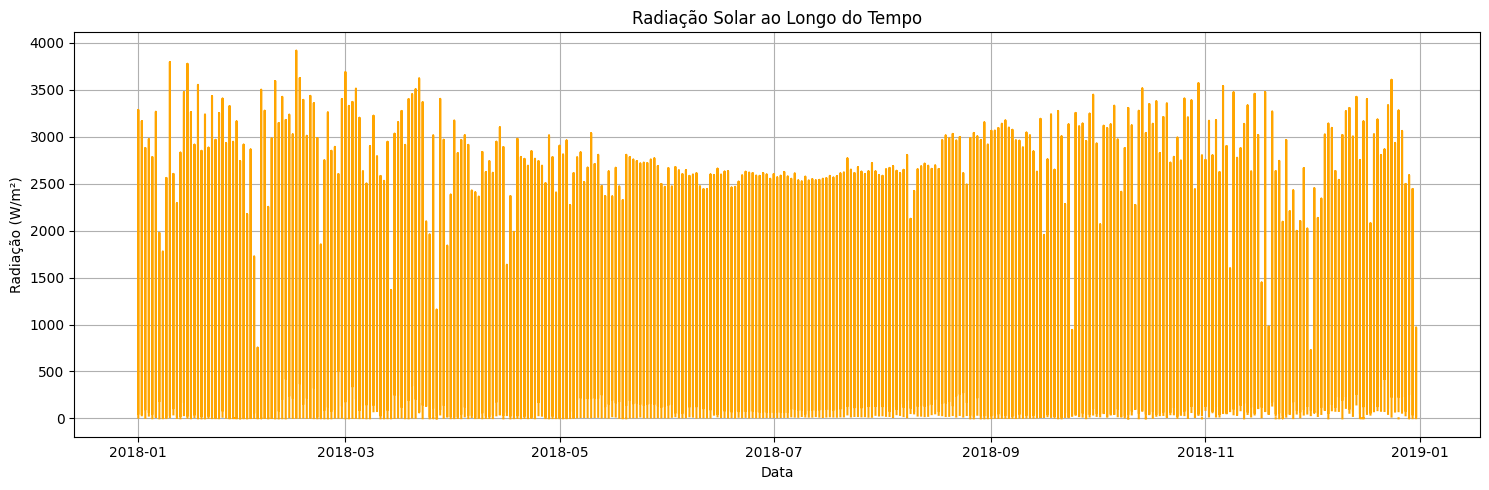

Média anual de radiação em 2024: nan W/m²


In [98]:
# Gráfico de serie temporal
plt.figure(figsize=(15,5))
plt.plot(df_climatotal['DATA'], df_climatotal['RADIACAO'], color='orange')
plt.xlabel('Data')
plt.ylabel('Radiação (W/m²)')
plt.title('Radiação Solar ao Longo do Tempo')
plt.grid(True)
plt.tight_layout()
plt.show()

media_2024 = df_2024['RADIACAO'].mean()
print(f"Média anual de radiação em 2024: {media_2024:.2f} W/m²")


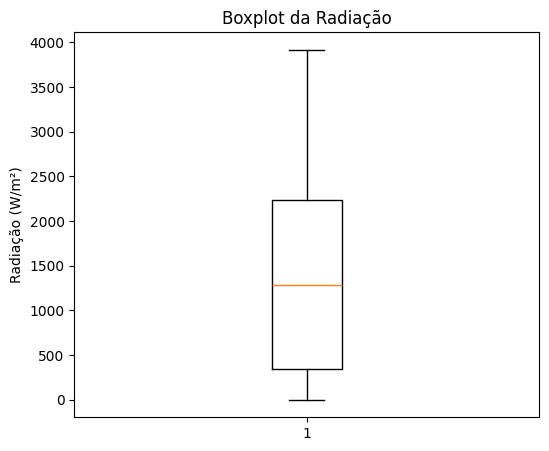

In [99]:
# Boxplot
plt.figure(figsize=(6,5))
plt.boxplot(df_climatotal['RADIACAO'].dropna())
plt.ylabel('Radiação (W/m²)')
plt.title('Boxplot da Radiação')
plt.show()



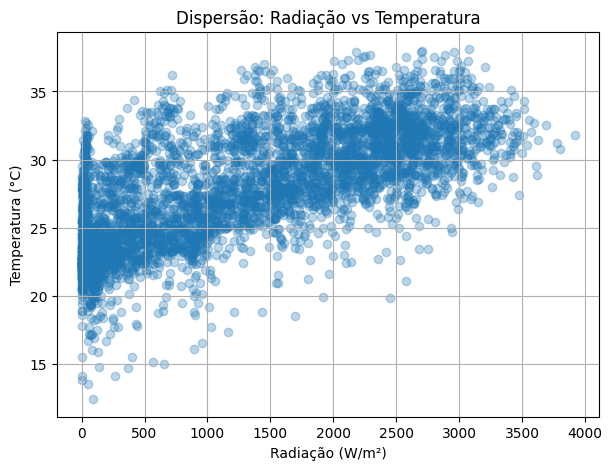

In [100]:
# Gráfico de Dispersão (Scatter Plot)
plt.figure(figsize=(7, 5))
plt.scatter(df_climatotal['RADIACAO'], df_climatotal['TEMPERATURA'], alpha=0.3)
plt.xlabel('Radiação (W/m²)')
plt.ylabel('Temperatura (°C)')
plt.title('Dispersão: Radiação vs Temperatura')
plt.grid(True)
plt.show()


# Produção agrícola
Fonte de dados CONAB, série histórica grãos https://portaldeinformacoes.conab.gov.br/downloads/arquivos/SerieHistoricaGraos.txt


4. Visualização de Dados
 Histograma - Distribuição das variáveis:


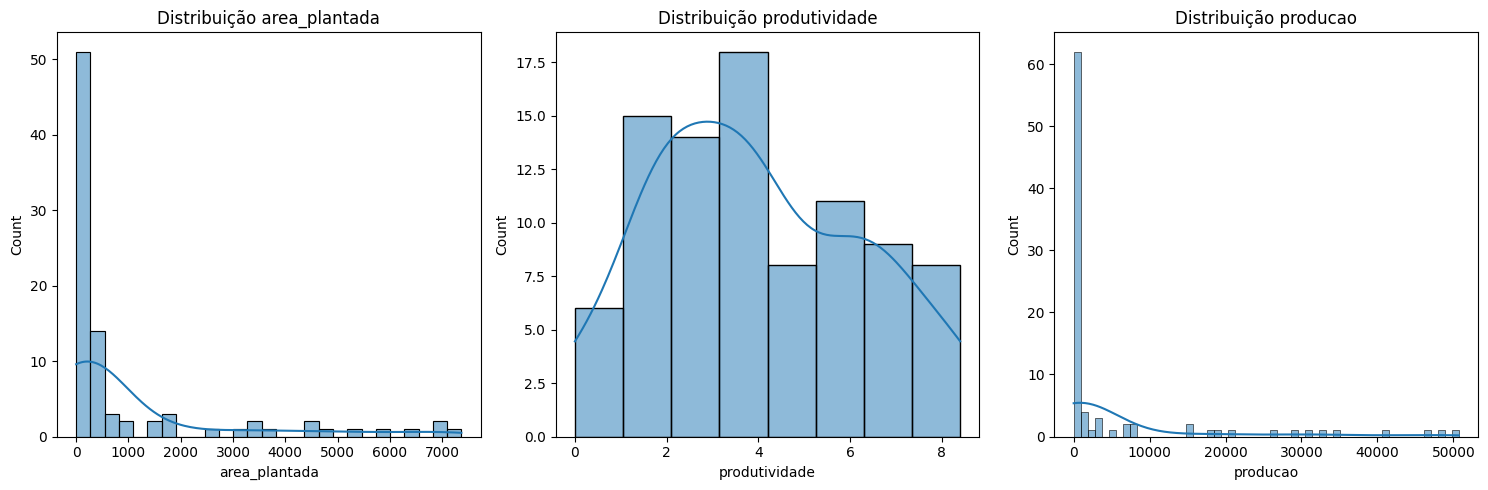

In [ ]:
## 4. Visualização de Dados
print("\n4. Visualização de Dados")

# 4.1 Distribuições (histogramas)
print(" Histograma - Distribuição das variáveis:")
plt.figure(figsize=(15, 5))

for i, coluna in enumerate(colunas_numericas):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_milho_mt[coluna], kde=True)
    plt.title(f'Distribuição {coluna}')

plt.tight_layout()
plt.show()


 Evolução temporal das métricas:


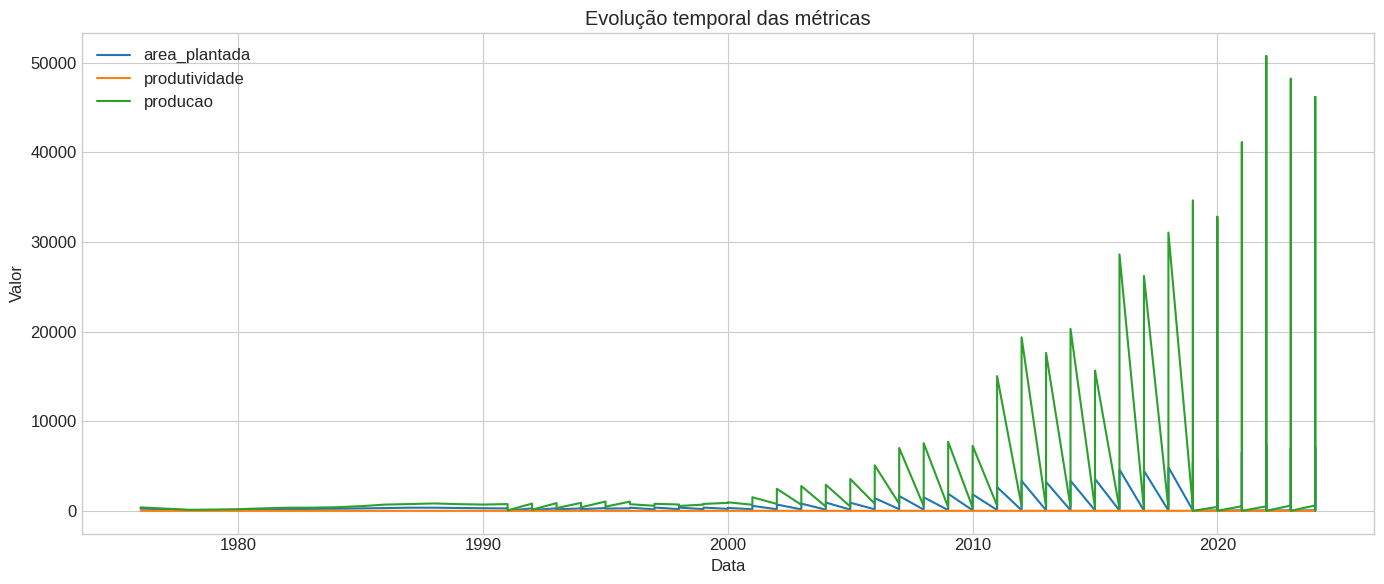

In [ ]:
# 4.2 Séries temporais
print("\n Evolução temporal das métricas:")
plt.figure(figsize=(14, 6))
for coluna in colunas_numericas:
    plt.plot(df_milho_mt['ano_inicio'], df_milho_mt[coluna], label=coluna)
plt.title('Evolução temporal das métricas')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 Dispersão - Relações entre variáveis:


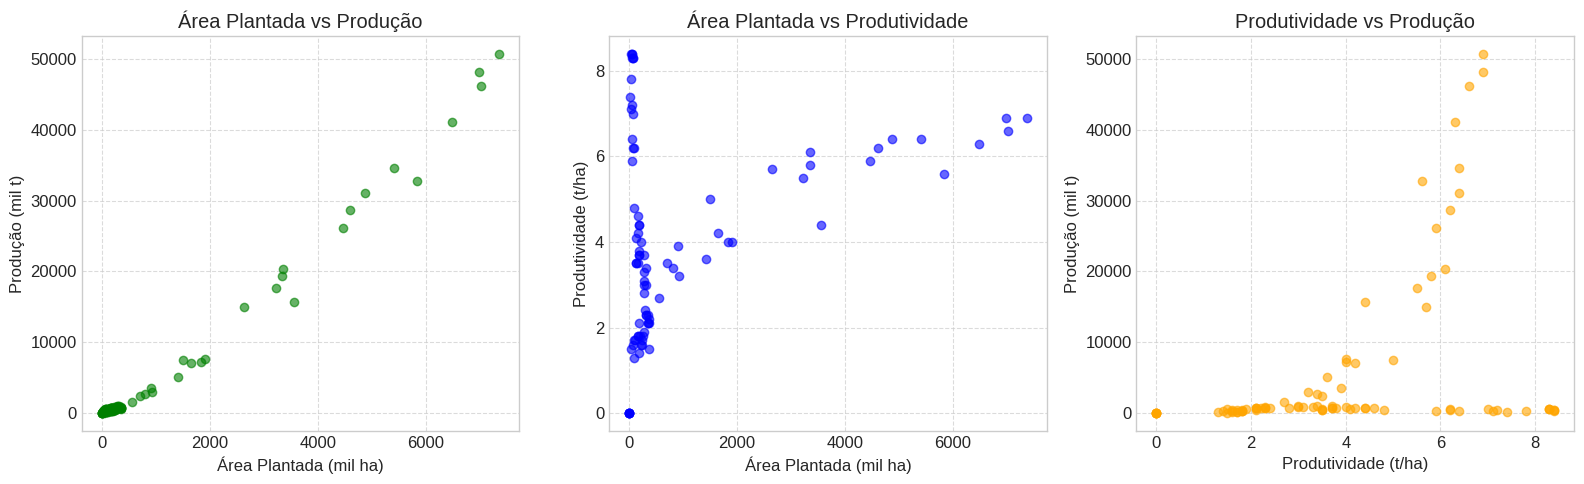

In [ ]:
# 4.3 Relações entre variáveis (dispersão)
print("\n Dispersão - Relações entre variáveis:")
plt.figure(figsize=(16, 5))

# Gráfico 1: Área Plantada vs Produção
plt.subplot(1, 3, 1)
plt.scatter(df_milho_mt['area_plantada'], df_milho_mt['producao'], alpha=0.6, color='green')
plt.title('Área Plantada vs Produção')
plt.xlabel('Área Plantada (mil ha)')
plt.ylabel('Produção (mil t)')
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfico 2: Área Plantada vs Produtividade
plt.subplot(1, 3, 2)
plt.scatter(df_milho_mt['area_plantada'], df_milho_mt['produtividade'], alpha=0.6, color='blue')
plt.title('Área Plantada vs Produtividade')
plt.xlabel('Área Plantada (mil ha)')
plt.ylabel('Produtividade (t/ha)')
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfico 3: Produtividade vs Produção
plt.subplot(1, 3, 3)
plt.scatter(df_milho_mt['produtividade'], df_milho_mt['producao'], alpha=0.6, color='orange')
plt.title('Produtividade vs Produção')
plt.xlabel('Produtividade (t/ha)')
plt.ylabel('Produção (mil t)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



 Boxplots - Comparação de distribuição entre variáveis (escalas separadas):


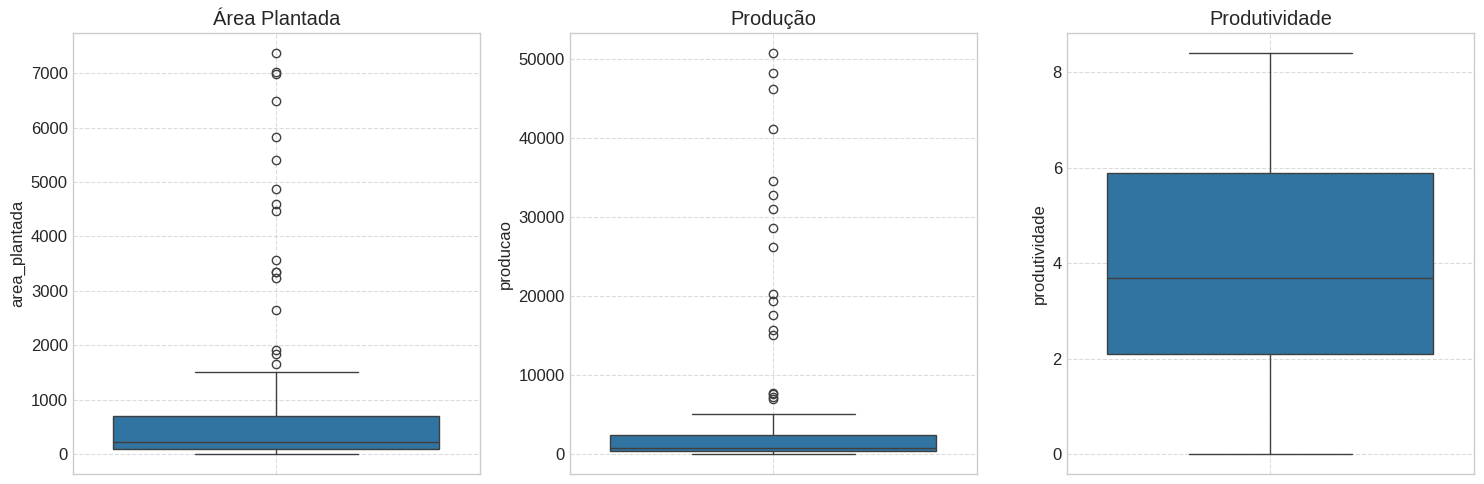


 Boxplots - Distribuição normalizada para comparação entre variáveis:


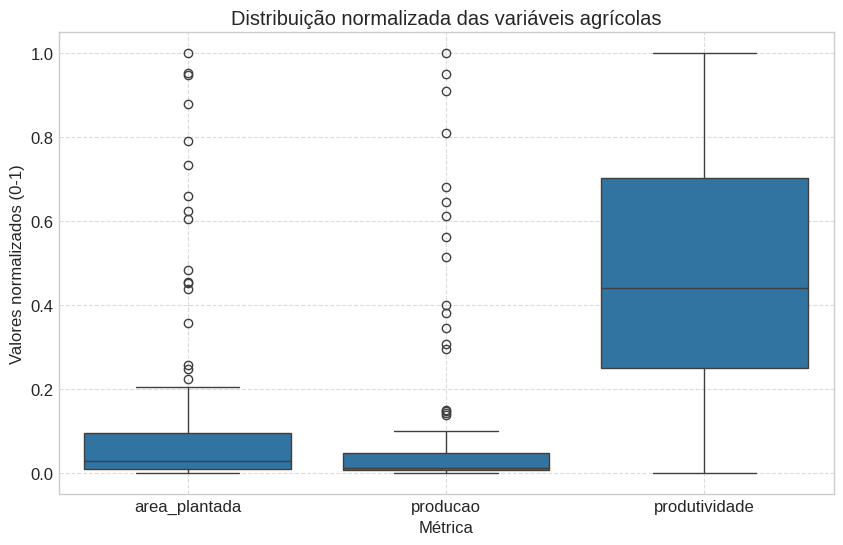

In [ ]:
# 4.4 Comparação de variáveis (boxplots)
# Definir as variáveis numéricas de interesse
colunas_numericas = ['area_plantada', 'producao', 'produtividade']

# Versão 1: Boxplots em escalas separadas
print("\n Boxplots - Comparação de distribuição entre variáveis (escalas separadas):")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_milho_mt['area_plantada'])
plt.title('Área Plantada')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 3, 2)
sns.boxplot(y=df_milho_mt['producao'])
plt.title('Produção')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 3, 3)
sns.boxplot(y=df_milho_mt['produtividade'])
plt.title('Produtividade')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Versão 2: Boxplots normalizados para comparação direta
print("\n Boxplots - Distribuição normalizada para comparação entre variáveis:")
plt.figure(figsize=(10, 6))

# Criar DataFrame para visualização
df_melt = df_milho_mt.melt(id_vars='ano_inicio', value_vars=colunas_numericas,
                  var_name='Métrica', value_name='Valor')

# Adicionar versão normalizada das variáveis
df_norm = df_milho_mt.copy()
for coluna in colunas_numericas:
    df_norm[coluna] = (df_milho_mt[coluna] - df_milho_mt[coluna].min()) / (df_milho_mt[coluna].max() - df_milho_mt[coluna].min())

df_melt_norm = df_norm.melt(id_vars='ano_inicio', value_vars=colunas_numericas,
                  var_name='Métrica', value_name='Valor Normalizado')

sns.boxplot(x='Métrica', y='Valor Normalizado', data=df_melt_norm)
plt.title('Distribuição normalizada das variáveis agrícolas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Valores normalizados (0-1)')
plt.show()



 Boxplots - Evolução por safra:


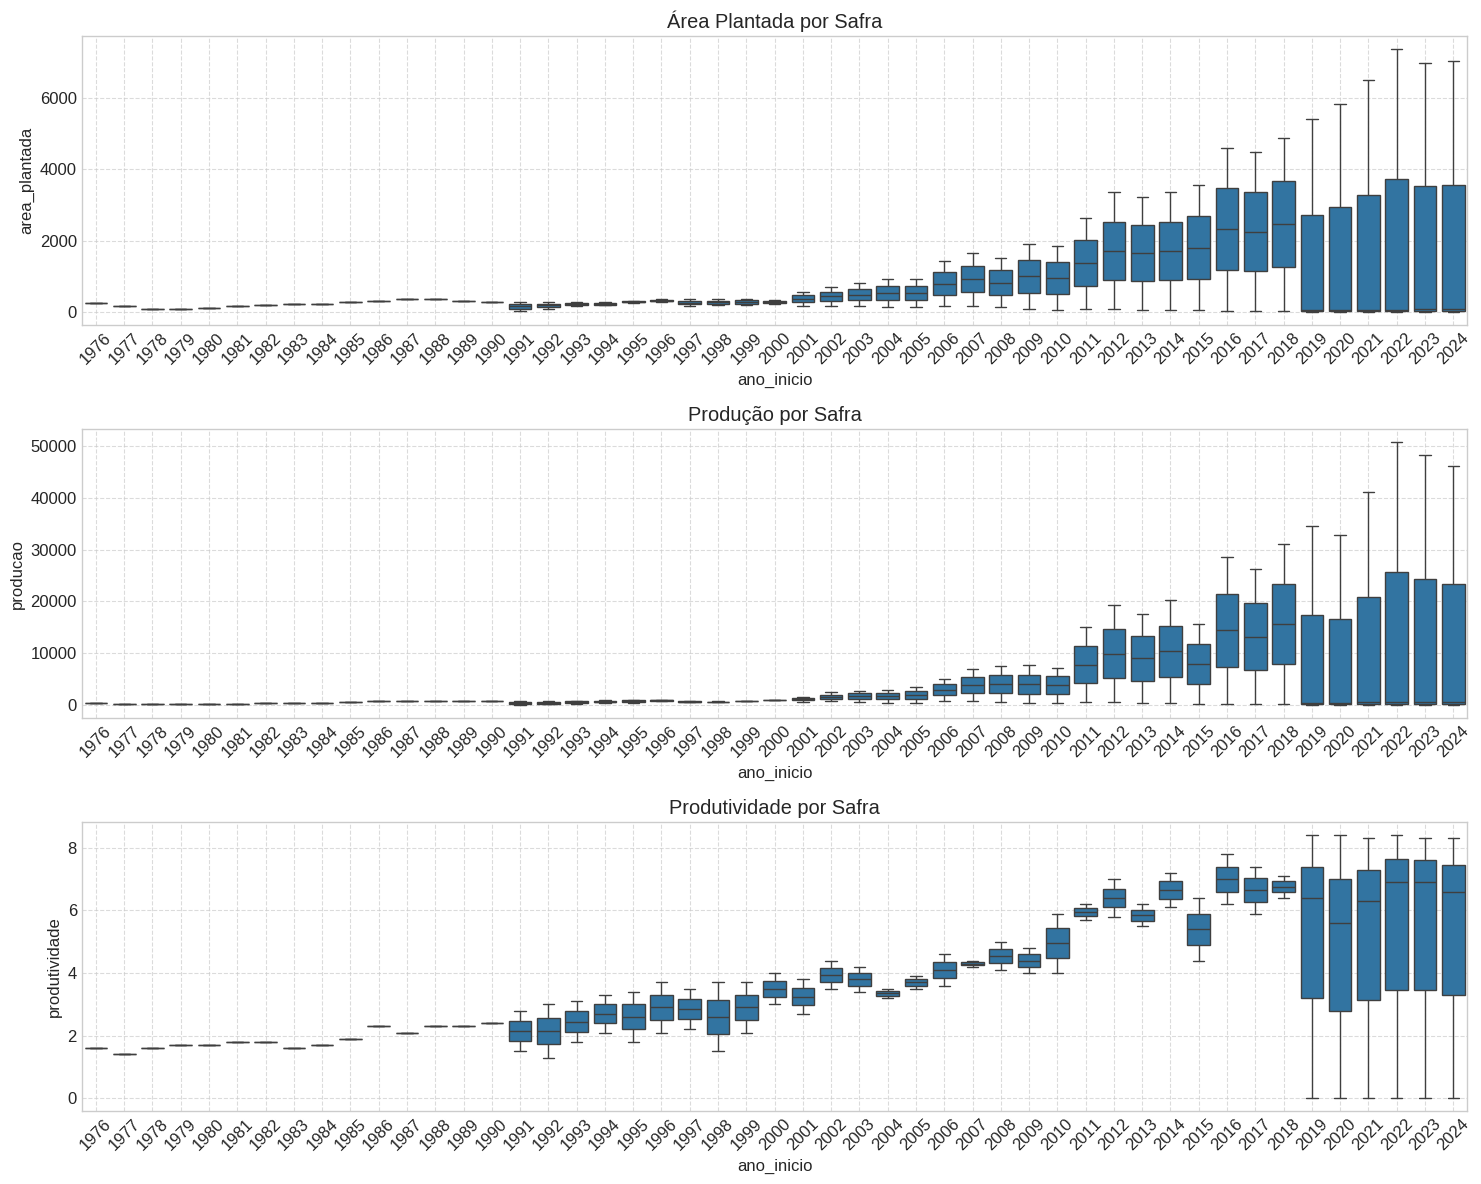

In [ ]:
# Boxplots agrupados por safra
print("\n Boxplots - Evolução por safra:")
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
sns.boxplot(x='ano_inicio', y='area_plantada', data=df_milho_mt)
plt.title('Área Plantada por Safra')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.boxplot(x='ano_inicio', y='producao', data=df_milho_mt)
plt.title('Produção por Safra')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.boxplot(x='ano_inicio', y='produtividade', data=df_milho_mt)
plt.title('Produtividade por Safra')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


 Matriz de correlação entre as métricas:


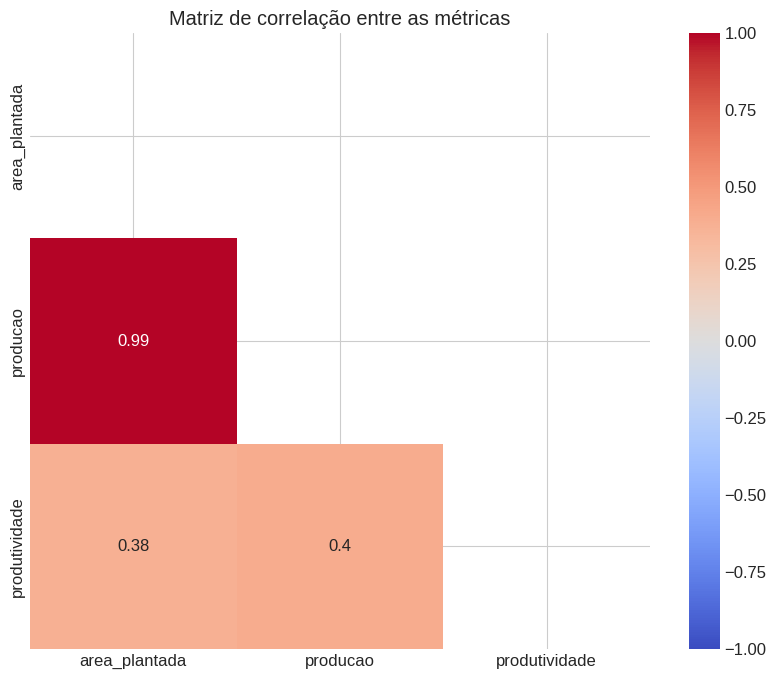

In [ ]:
# 4.5 Matriz de correlação
print("\n Matriz de correlação entre as métricas:")
plt.figure(figsize=(10, 8))
corr = df_milho_mt[colunas_numericas].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Matriz de correlação entre as métricas')
plt.show()

In [ ]:
# 4.6 Visualizações interativas com Altair
print("\n Visualização interativa de séries temporais:")

# Criar gráfico interativo para cada métrica
charts = []
for coluna in colunas_numericas:
    chart = alt.Chart(df_milho_mt).mark_line().encode(
        x='ano_inicio',
        y=alt.Y(coluna, title=coluna),
        tooltip=['ano_inicio', coluna]
    ).properties(
        title=f'Série Temporal - {coluna}',
        width=300,
        height=200
    )
    charts.append(chart)

# Exibir gráficos em grid
display(alt.vconcat(*charts))


 Visualização interativa de séries temporais:


alt.VConcatChart(...)

In [ ]:
## 5. Exportação/Salvamento dos Dados Processados
print("\n5. Exportação dos Dados Processados")
df_milho_mt.to_csv('milho_mt_filtrado.csv', index=False)
print("\n Dados filtrados salvos como 'milho_mt_filtrado.csv'")


5. Exportação dos Dados Processados

 Dados filtrados salvos como 'milho_mt_filtrado.csv'


# Etapa 2 – Extração de Informações Relevantes:

*   Definir variáveis-chave a serem utilizadas no modelo, a partir da análise
exploratória dos dados.
*   Analisar a relação entre NDVI e produtividade agrícola, identificando os períodos críticos de crescimento da cultura.
*   Aplicar técnicas de segmentação para destacar áreas específicas de cultivo na imagem de satélite.

Definir variáveis-chave a serem utilizadas no modelo, a partir da análise exploratória dos dados.


1.   Vegetação (SatVeg)	NDVI	Preditividade, vigor da cultura
2.   Meteorologia	Precipitação acumulada	Impacto direto no rendimento
3.   Meteorologia	Temperatura média	Influência no ciclo de crescimento
4.   Agrícola	Produtividade	Alvo a ser predito (t/ha)
5.   Temporal	Ano-início/Safra	Capitula avanço tecnológico/clima


In [ ]:
df = pd.read_csv('satveg_processado.csv')
print("Arquivo CSV carregado com sucesso!")
print(df.head()) # Exibe as primeiras linhas do DataFrame

print("Tipos de dados de cada coluna:")
print(df.dtypes)


Arquivo CSV carregado com sucesso!
         Data    NDVI  PreFiltro  FlatBottom  NDVI_media_diaria   AnoMes  \
0  2000-02-18  0.6119     0.6542      0.6542             0.6119  2000-02   
1  2000-03-05  0.6542     0.6542      0.6542             0.6542  2000-03   
2  2000-03-21  0.5751     0.5751      0.6542             0.5751  2000-03   
3  2000-04-06  0.6839     0.6839      0.6839             0.6839  2000-04   
4  2000-04-22  0.4797     0.4797      0.4808             0.4797  2000-04   

   NDVI_media_mensal  
0            0.61190  
1            0.61465  
2            0.61465  
3            0.58180  
4            0.58180  
Tipos de dados de cada coluna:
Data                  object
NDVI                 float64
PreFiltro            float64
FlatBottom           float64
NDVI_media_diaria    float64
AnoMes                object
NDVI_media_mensal    float64
dtype: object


In [ ]:
# Converter a coluna 'Data' para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

# Selecionar apenas as colunas 'Data' e 'NDVI'
df_selecionado = df[['AnoMes','NDVI_media_mensal']].copy()

# Exibir o tipo de dados atualizado da coluna 'Data'
print("Tipos de dados após a conversão:")
print(df_selecionado.dtypes)

# Exibir as primeiras linhas do DataFrame resultante
print("\nDataFrame com apenas 'AnoMes' e 'NDVI_media_mensal':")
print(df_selecionado.head())

Tipos de dados após a conversão:
AnoMes                object
NDVI_media_mensal    float64
dtype: object

DataFrame com apenas 'AnoMes' e 'NDVI_media_mensal':
    AnoMes  NDVI_media_mensal
0  2000-02            0.61190
1  2000-03            0.61465
2  2000-03            0.61465
3  2000-04            0.58180
4  2000-04            0.58180


In [ ]:
## 5. Exportação/Salvamento dos Dados Processados
print("\n5. Exportação dos Dados Processados")
df_selecionado.to_csv('ndvi_mensal.csv', index=False)
print("\n Arquivo salvo 'inmet_consolidado.csv'")


5. Exportação dos Dados Processados

 Arquivo salvo 'inmet_consolidado.csv'


In [ ]:
df = pd.read_csv('milho_mt_filtrado.csv')
print("Arquivo CSV carregado com sucesso!")
print(df.head()) # Exibe as primeiras linhas do DataFrame

print("Tipos de dados de cada coluna:")
print(df.dtypes)

Arquivo CSV carregado com sucesso!
                    ano dsc_safra_previsao  uf  \
0  1976/77                1Âª SAFRA         MT   
1  1977/78                1Âª SAFRA         MT   
2  1978/79                1Âª SAFRA         MT   
3  1979/80                1Âª SAFRA         MT   
4  1980/81                1Âª SAFRA         MT   

                                    produto  id_produto  area_plantada  \
0  MILHO                                           4742          247.0   
1  MILHO                                           4742          179.0   
2  MILHO                                           4742           76.0   
3  MILHO                                           4742           86.0   
4  MILHO                                           4742          110.0   

   producao  produtividade  ano_inicio  
0     385.0            1.6        1976  
1     250.0            1.4        1977  
2     118.0            1.6        1978  
3     143.0            1.7        1979  
4     185.0   

In [ ]:
import pandas as pd
import re

df = pd.read_csv('milho_mt_filtrado.csv')

# Ajusta nome correto da coluna de safra (procura o nome real):
col_ano = 'ano'
col_safra_original = None
for nome in df.columns:
    if 'safra' in nome and 'previsao' in nome:
        col_safra_original = nome
        break
if col_safra_original is None:
    raise Exception('Coluna com "safra" e "previsao" não localizada.')

# Limpa a coluna de safra original, padronizando para maiúsculo, sem 'Â', sem espaços
df[col_safra_original] = df[col_safra_original].str.replace('Â', '', regex=False).str.strip().str.upper()

# **Filtra/remova as linhas da 3ª SAFRA**
#     - Remove 'ª' e espaços, compara com "3SAFRA"
mascara_3safra = df[col_safra_original].str.replace('ª', '', regex=False)
mascara_3safra = mascara_3safra.str.replace(' ', '', regex=False)
df = df[~(mascara_3safra == '3SAFRA')].copy()

def calcula_anomes(row):
    # Extrai os quatro primeiros dígitos do ano
    ano_str = str(row[col_ano])
    match = re.match(r'(\d{4})', ano_str)
    if match:
        ano = match.group(1)
    else:
        return pd.NA
    # Remove 'ª' e espaços da safra
    safra = str(row[col_safra_original]).replace('ª', '')
    safra = ''.join(safra.split())
    if safra == '1SAFRA':
        mes = '09'
    elif safra == '2SAFRA':
        mes = '01'
    else:
        return pd.NA
    return f'{ano}-{mes}'

df['AnoMes'] = df.apply(calcula_anomes, axis=1)

# Agora crie uma nova coluna 'safra' limpa, baseada na coluna original já tratada
df['safra'] = df[col_safra_original]

colunas_exibir = ['AnoMes', 'safra', 'area_plantada', 'producao', 'produtividade']
for col in colunas_exibir:
    if col not in df.columns:
        print(f'ATENÇÃO: Coluna "{col}" não existe no DataFrame.')

print(df[colunas_exibir].head(12))


     AnoMes     safra  area_plantada  producao  produtividade
0   1976-09  1ª SAFRA          247.0     385.0            1.6
1   1977-09  1ª SAFRA          179.0     250.0            1.4
2   1978-09  1ª SAFRA           76.0     118.0            1.6
3   1979-09  1ª SAFRA           86.0     143.0            1.7
4   1980-09  1ª SAFRA          110.0     185.0            1.7
5   1981-09  1ª SAFRA          158.0     278.0            1.8
6   1982-09  1ª SAFRA          198.0     348.0            1.8
7   1983-09  1ª SAFRA          217.0     358.0            1.6
8   1984-09  1ª SAFRA          236.0     401.0            1.7
9   1985-09  1ª SAFRA          275.0     522.0            1.9
10  1986-09  1ª SAFRA          310.0     698.0            2.3
11  1987-09  1ª SAFRA          353.0     756.0            2.1


In [ ]:
## 5. Exportação/Salvamento dos Dados Processados
colunas_exibir = ['AnoMes', 'safra', 'area_plantada', 'producao', 'produtividade']

# Salvar apenas essas colunas em um novo CSV
df[colunas_exibir].to_csv('milho_mt_mensal.csv', index=False, encoding='utf-8')


In [ ]:
pd.read_csv('milho_mt_mensal.csv')


,AnoMes,safra,area_plantada,producao,produtividade
0,1976-09,1ª SAFRA,247.0,385.0,1.6
1,1977-09,1ª SAFRA,179.0,250.0,1.4
2,1978-09,1ª SAFRA,76.0,118.0,1.6
3,1979-09,1ª SAFRA,86.0,143.0,1.7
4,1980-09,1ª SAFRA,110.0,185.0,1.7
...,...,...,...,...,...
78,2022-01,2ª SAFRA,7367.3,50731.2,6.9
79,2023-09,1ª SAFRA,70.8,590.3,8.3
80,2023-01,2ª SAFRA,6984.2,48204.9,6.9
81,2024-09,1ª SAFRA,72.7,603.6,8.3


In [ ]:
df = pd.read_csv('inmet_consolidado_mensal.csv')
print("Arquivo CSV carregado com sucesso!")
print(df.head()) # Exibe as primeiras linhas do DataFrame

print("Tipos de dados de cada coluna:")
print(df.dtypes)

Arquivo CSV carregado com sucesso!
   ano_mes  precipitacao     pressao  radiacao  temperatura_media     umidade  \
0  2005-01      0.000000  969.251610       NaN          25.342140 -138.239583   
1  2005-01      0.000000  969.419491       NaN          24.749277  -68.197917   
2  2005-01      0.000000  969.302812       NaN          25.653923 -244.343750   
3  2005-01      0.000000  969.107860       NaN          26.296149  -70.927083   
4  2005-01      0.033333  969.260524       NaN          26.195120 -210.461806   

   vento_direcao  vento_rajada  vento_velocidade        data   ano  
0     -73.875000      0.116667               0.0  2005-01-01  2005  
1      11.854167      0.116667               0.0  2005-01-02  2005  
2    -168.229167      0.041667               0.0  2005-01-03  2005  
3      25.013889      0.058333               0.0  2005-01-04  2005  
4    -149.211806      0.050000               0.0  2005-01-05  2005  
Tipos de dados de cada coluna:
ano_mes               object
prec

In [ ]:
import pandas as pd

# Carregue os arquivos normalmente
df_nvdi = pd.read_csv('ndvi_mensal.csv')
df_graos = pd.read_csv('milho_mt_mensal.csv')
df_clima = pd.read_csv('inmet_consolidado_mensal.csv')

# Obtenha o número de linhas e colunas
print('NDVI:', df_nvdi.shape[0], 'linhas e', df_nvdi.shape[1], 'colunas')
print('Grãos:', df_graos.shape[0], 'linhas e', df_graos.shape[1], 'colunas')
print('Clima:', df_clima.shape[0], 'linhas e', df_clima.shape[1], 'colunas')

# Pegando o menor AnoMes em cada base
print('NDVI começa em:', df_nvdi['AnoMes'].min())
print('Grãos começa em:', df_graos['AnoMes'].min())
print('Clima começa em:', df_clima['ano_mes'].min())

print('NDVI termina em:', df_nvdi['AnoMes'].max())
print('Grãos termina em:', df_graos['AnoMes'].max())
print('Clima termina em:', df_clima['ano_mes'].max())


NDVI: 576 linhas e 2 colunas
Grãos: 83 linhas e 5 colunas
Clima: 108 linhas e 11 colunas
NDVI começa em: 2000-02
Grãos começa em: 1976-09
Clima começa em: 2005-01
NDVI termina em: 2025-02
Grãos termina em: 2024-09
Clima termina em: 2005-09


In [ ]:
import pandas as pd

df_clima = pd.read_csv('clima_Sorriso_2025.csv')

# Ajuste a visualização para o número de linhas da base clima
pd.set_option('display.max_rows', len(df_clima))

# Agora, ao imprimir, verá todas as linhas
print(df_clima)


FileNotFoundError: [Errno 2] No such file or directory: 'clima_Sorriso_2025.csv'

In [ ]:
## 3. Análise Exploratória Básica
print("\n3. Análise Exploratória Básica")
print("- Primeiras linhas dos dados:")
display(df_milho_mt.head())

print("\n- Resumo estatístico das colunas numéricas:")
display(df_milho_mt[colunas_numericas].describe())


3. Análise Exploratória Básica
- Primeiras linhas dos dados:


,ano,dsc_safra_previsao,uf,produto,id_produto,area_plantada,producao,produtividade,ano_inicio
0,1976/77,1Âª SAFRA,MT,MILHO,4742,247.0,385.0,1.6,1976
1,1977/78,1Âª SAFRA,MT,MILHO,4742,179.0,250.0,1.4,1977
2,1978/79,1Âª SAFRA,MT,MILHO,4742,76.0,118.0,1.6,1978
3,1979/80,1Âª SAFRA,MT,MILHO,4742,86.0,143.0,1.7,1979
4,1980/81,1Âª SAFRA,MT,MILHO,4742,110.0,185.0,1.7,1980



- Resumo estatístico das colunas numéricas:


,area_plantada,produtividade,producao
count,89.000000,89.000000,89.000000
mean,1033.767416,3.961798,5700.775281
std,1846.049375,2.315290,11889.778998
min,0.000000,0.000000,0.000000
25%,85.000000,2.100000,385.000000
50%,220.000000,3.700000,698.000000
75%,704.000000,5.900000,2456.000000
max,7367.300000,8.400000,50731.200000
